# <center> Machine Failure Prediction

### Importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
import numpy as np

### Reading the input data

In [2]:
data=pd.read_csv('Maintenance.csv')
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
data['TWF'].nunique()

2

In [4]:
data.shape

(10000, 14)

In [5]:
data['Product ID'].nunique()

10000

In [6]:
data['Machine failure'].sum()

339

In [7]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [3]:
label=LabelEncoder()
data['Type']=label.fit_transform(data['Type'])
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
data[data['Machine failure']==1]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,1,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,70,L47249,1,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,78,L47257,1,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,161,L47340,1,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,162,L47341,1,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,1,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9764,9765,L56944,1,298.5,309.5,1294,66.7,12,1,0,0,1,0,0
9822,9823,L57002,1,298.5,309.4,1360,60.9,187,1,0,0,0,1,0
9830,9831,L57010,1,298.3,309.3,1337,56.1,206,1,0,0,0,1,0


In [9]:
data[data['Machine failure'] ==1][['TWF','HDF','PWF','OSF','RNF']].apply(pd.value_counts)

,TWF,HDF,PWF,OSF,RNF
0,293,224,244,241,338
1,46,115,95,98,1


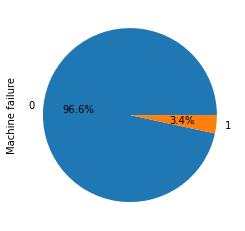

In [10]:
data['Machine failure'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

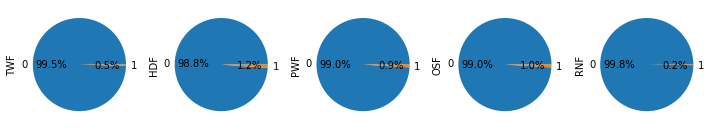

In [11]:
plt.figure(figsize=(10,9))
plt.subplot(1,5,1)
data['TWF'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.subplot(1,5,2)
data['HDF'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.subplot(1,5,3)
data['PWF'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.subplot(1,5,4)
data['OSF'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.subplot(1,5,5)
data['RNF'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.tight_layout()
plt.show()

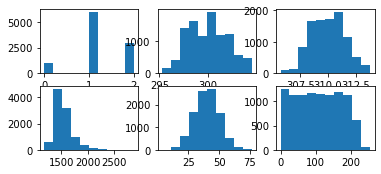

In [12]:
data1=data.drop(['UDI','Product ID','TWF','HDF','PWF','OSF','RNF','Machine failure'],axis=1)
plt.subplot(3,3,1)
plt.hist(data1['Type'])
plt.subplot(3,3,2)
plt.hist(data1['Air temperature [K]'])
plt.subplot(3,3,3)
plt.hist(data1['Process temperature [K]'])
plt.subplot(3,3,4)
plt.hist(data1['Rotational speed [rpm]'])
plt.subplot(3,3,5)
plt.hist(data1['Torque [Nm]'])
plt.subplot(3,3,6)
plt.hist(data1['Tool wear [min]'])
plt.show()

In [13]:
data.dtypes

UDI                          int64
Product ID                  object
Type                         int64
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [14]:
data1.describe()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.19940,300.004930,310.005560,1538.776100,39.986910,107.951000
std,0.60023,2.000259,1.483734,179.284096,9.968934,63.654147
min,0.00000,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,1.00000,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,1.00000,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,2.00000,301.500000,311.100000,1612.000000,46.800000,162.000000
max,2.00000,304.500000,313.800000,2886.000000,76.600000,253.000000


In [15]:
data.corr()

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,1.000000,0.005529,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892,0.009154,-0.022215,-0.023557,-0.000990,-0.005954
Type,0.005529,1.000000,0.017599,0.013444,-0.002693,0.004011,-0.003930,-0.005152,-0.005349,0.000108,0.012121,-0.021211,-0.022147
Air temperature [K],0.117428,0.017599,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688
Process temperature [K],0.324428,0.013444,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279
Rotational speed [rpm],-0.006615,-0.002693,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.010389,-0.121241,0.123018,-0.104575,-0.013088
Torque [Nm],0.003207,0.004011,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136
Tool wear [min],-0.010702,-0.003930,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326
Machine failure,-0.022892,-0.005152,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516
TWF,0.009154,-0.005349,0.009955,0.007315,0.010389,-0.014662,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970
HDF,-0.022215,0.000108,0.137831,0.056933,-0.121241,0.142610,-0.001287,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706


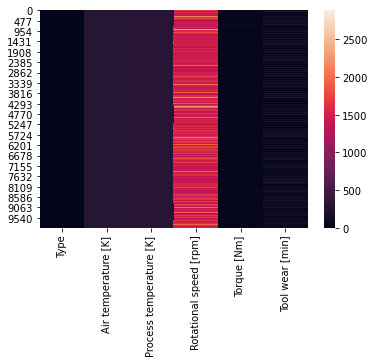

In [16]:
sns.heatmap(data1)
plt.show()

<AxesSubplot:>

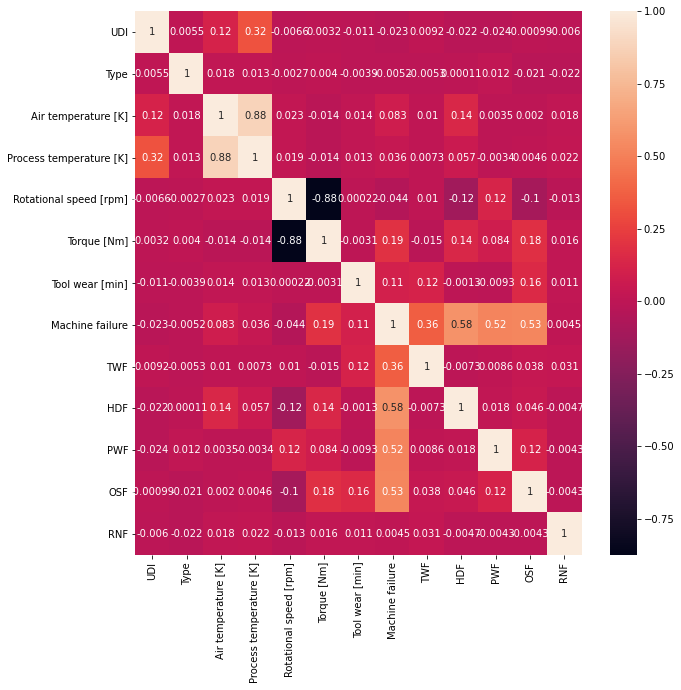

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

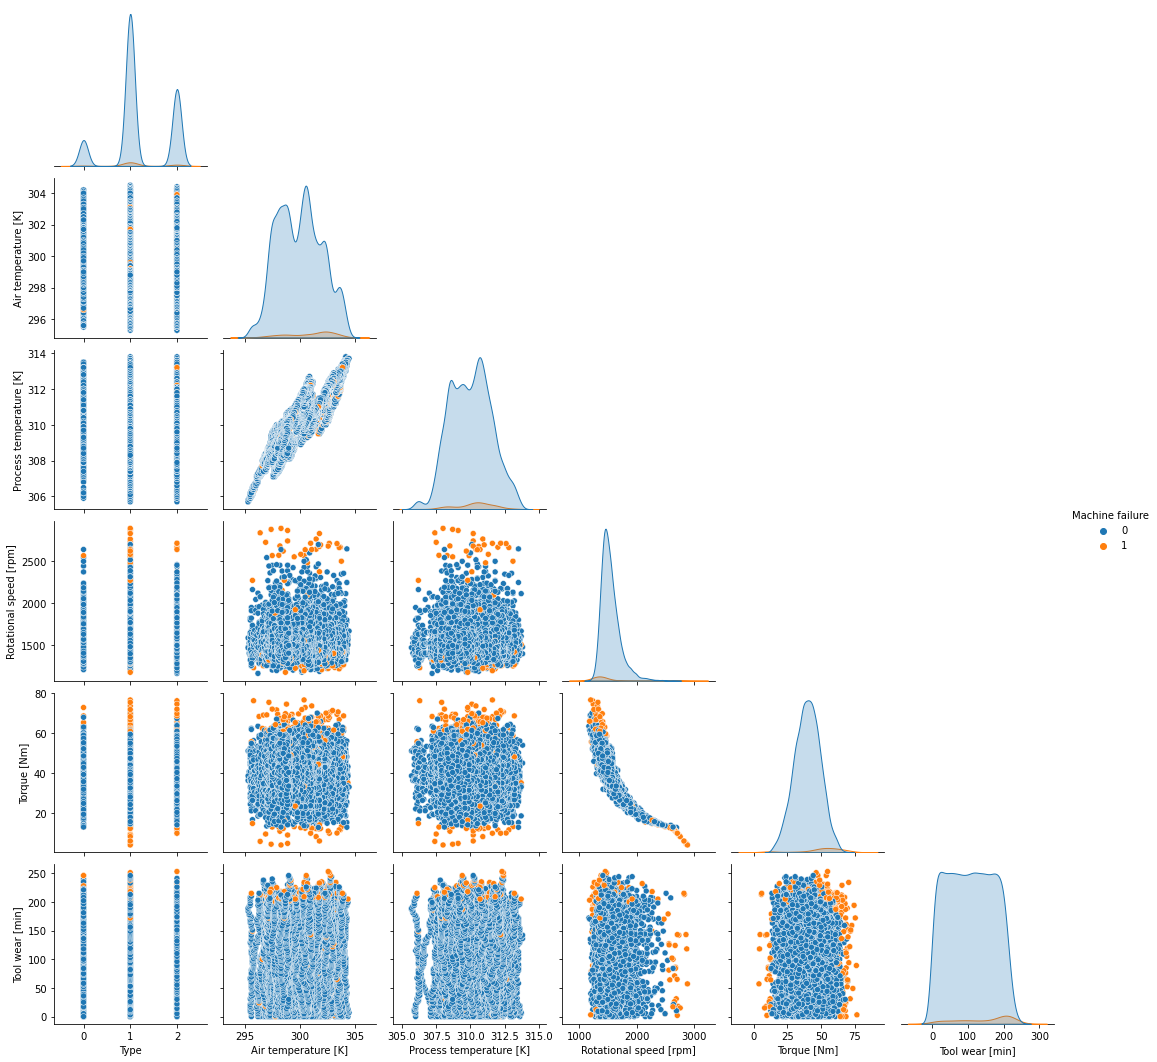

In [18]:
def plot_pair():
    sns.pairplot(data=data.drop(['UDI', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1).select_dtypes(include='number'),
                 hue='Machine failure',
                 #plot_kws={'s':6},
                 corner=True
                 )
    plt.show()

plot_pair()

/Users/lakshmipriya/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


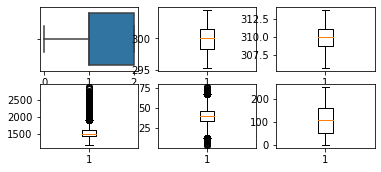

In [19]:
plt.subplot(3,3,1)
sns.boxplot(data1['Type'])
plt.subplot(3,3,2)
plt.boxplot(data1['Air temperature [K]'])
plt.subplot(3,3,3)
plt.boxplot(data1['Process temperature [K]'])
plt.subplot(3,3,4)
plt.boxplot(data1['Rotational speed [rpm]'])
plt.subplot(3,3,5)
plt.boxplot(data1['Torque [Nm]'])
plt.subplot(3,3,6)
plt.boxplot(data1['Tool wear [min]'])
plt.show()

In [20]:
data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [4]:
data=data.rename({'Air temperature [K]':'AT','Process temperature [K]':'PT','Rotational speed [rpm]':'RS',
            'Torque [Nm]':'T','Tool wear [min]':'TW','Machine failure':'Machine_failure'},axis=1)
data.head()

,UDI,Product ID,Type,AT,PT,RS,T,TW,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


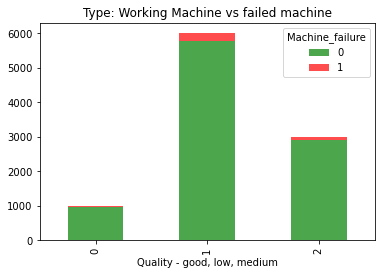

In [22]:
temp = data.groupby(['Type','Machine_failure']).Type.count().unstack()
t1 = temp.plot(kind = 'bar', stacked = True, 
                   title = 'Type: Working Machine vs failed machine', 
                   color = ['green','red'], alpha = .70)
plt.xlabel('Quality - good, low, medium')
plt.show()

# <center> Feature engineering

### Label encoding and Random upsampling of data and Feature importance

In [5]:
ros = RandomOverSampler(random_state=42)
from imblearn.over_sampling import SMOTE

In [6]:
x=data.drop(['Machine_failure'],axis=1)
y=data.Machine_failure

In [7]:
x1,y1= ros.fit_resample(x, y)

In [8]:
len(y1), len(x1)

(19322, 19322)

In [9]:
len(y),len(x)

(10000, 10000)

### Upsampling With SMOTE

In [10]:
data2=data.drop(['Product ID'],axis=1)

In [11]:
smote = SMOTE()

In [12]:
X=data2.drop(['Machine_failure'],axis=1)
Y=data2.Machine_failure

In [13]:
x_smote, y_smote = smote.fit_resample(X, Y)
len(y_smote), len(x_smote)

(19322, 19322)

In [14]:
x_smote

,UDI,Type,AT,PT,RS,T,TW,TWF,HDF,PWF,OSF,RNF
0,1,2,298.100000,308.600000,1551,42.800000,0,0,0,0,0,0
1,2,1,298.200000,308.700000,1408,46.300000,3,0,0,0,0,0
2,3,1,298.100000,308.500000,1498,49.400000,5,0,0,0,0,0
3,4,1,298.200000,308.600000,1433,39.500000,7,0,0,0,0,0
4,5,1,298.200000,308.700000,1408,40.000000,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19317,1559,1,298.345120,308.676806,2555,8.988849,75,0,0,1,0,0
19318,6249,1,300.819599,310.139199,1402,60.817810,190,0,0,0,1,0
19319,4530,1,302.400000,310.200000,1349,49.187395,153,0,1,0,0,0
19320,4155,2,301.952428,310.434952,1369,48.611658,82,0,1,0,0,0


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.4,random_state=20)

In [28]:
X_train=x_train.drop(['UDI','TWF','HDF','OSF','PWF','RNF'],axis=1)
X_test=x_test.drop(['UDI','TWF','HDF','OSF','PWF','RNF'],axis=1)

# <center> Model building

### 1) Logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [35]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

/Users/lakshmipriya/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
pred_log=log_reg.predict(x_test)

In [39]:
cm=confusion_matrix(pred_log,y_test)
accuracy1=accuracy_score(pred_log,y_test)
print(cm,accuracy1)

[[3408  429]
 [ 444 3448]] 0.8870487773321257


In [40]:
classification_report(pred_log,y_test)

'              precision    recall  f1-score   support\n\n           0       0.88      0.89      0.89      3837\n           1       0.89      0.89      0.89      3892\n\n    accuracy                           0.89      7729\n   macro avg       0.89      0.89      0.89      7729\nweighted avg       0.89      0.89      0.89      7729\n'

In [41]:
pred_log_train=log_reg.predict(x_train)

classification_report(pred_log_train,y_train)


'              precision    recall  f1-score   support\n\n           0       0.88      0.90      0.89      5725\n           1       0.90      0.89      0.89      5868\n\n    accuracy                           0.89     11593\n   macro avg       0.89      0.89      0.89     11593\nweighted avg       0.89      0.89      0.89     11593\n'

### 2) SVM

In [42]:
from sklearn.svm import SVC 

In [43]:
# kernel is linear
svc=SVC(gamma=0.22)
svc.fit(x_train,y_train)


SVC(gamma=0.22)

In [44]:
svc_score=svc.score(x_test,y_test)
svc_score

0.6876698149825333

In [45]:
# kernel is radial
svc2=SVC(gamma=0.22,kernel='rbf',C=1)
svc2.fit(x_train,y_train)


SVC(C=1, gamma=0.22)

In [46]:
svc_score2=svc2.score(x_test,y_test)
svc_score2

0.6876698149825333

In [47]:
svc_pred2=svc2.predict(x_test)
classification_report(svc_pred2,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      0.61      0.76      6266\n           1       0.38      1.00      0.55      1463\n\n    accuracy                           0.69      7729\n   macro avg       0.69      0.81      0.65      7729\nweighted avg       0.88      0.69      0.72      7729\n'

In [48]:
cm=confusion_matrix(svc_pred2,y_test)
cm

array([[3852, 2414],
       [   0, 1463]])

In [49]:
pred_svm_train=svc2.predict(x_train)

classification_report(pred_svm_train,y_train)



'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      5809\n           1       1.00      1.00      1.00      5784\n\n    accuracy                           1.00     11593\n   macro avg       1.00      1.00      1.00     11593\nweighted avg       1.00      1.00      1.00     11593\n'

In [50]:
# kernel is sigmoid
svc3=SVC(gamma=0.22,kernel='sigmoid',C=1)
svc3.fit(x_train,y_train)

SVC(C=1, gamma=0.22, kernel='sigmoid')

In [51]:
svc_score3=svc3.score(x_test,y_test)
svc_score3

0.49838271445206367

In [52]:
svc_pred3=svc3.predict(x_test)

In [53]:
classification_report(svc_pred3,y_test)

/Users/lakshmipriya/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lakshmipriya/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lakshmipriya/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       1.00      0.50      0.67      7729\n           1       0.00      0.00      0.00         0\n\n    accuracy                           0.50      7729\n   macro avg       0.50      0.25      0.33      7729\nweighted avg       1.00      0.50      0.67      7729\n'

In [54]:
# kernel is polynomial
#svc4=SVC(gamma=0.22,kernel='poly',C=1)
#svc4.fit(x_train,y_train)

In [55]:
#svc_score4=svc4.score(x_test,y_test)
#svc_score4

### 3) Naive bayes

In [56]:
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB


In [57]:
mult_nb=MB()
mult_nb.fit(x_train,y_train)
mult_nb.score(x_test,y_test)




0.5571225255531117

In [58]:
pred_mult_nb=mult_nb.predict(x_test)
classification_report(pred_mult_nb,y_test)

'              precision    recall  f1-score   support\n\n           0       0.54      0.56      0.55      3703\n           1       0.58      0.56      0.57      4026\n\n    accuracy                           0.56      7729\n   macro avg       0.56      0.56      0.56      7729\nweighted avg       0.56      0.56      0.56      7729\n'

In [59]:
cm=confusion_matrix(pred_mult_nb,y_test)
cm

array([[2066, 1637],
       [1786, 2240]])

In [60]:
pred_mulnb_train=mult_nb.predict(x_train)

classification_report(pred_mulnb_train,y_train)




'              precision    recall  f1-score   support\n\n           0       0.56      0.58      0.57      5606\n           1       0.59      0.57      0.58      5987\n\n    accuracy                           0.57     11593\n   macro avg       0.57      0.57      0.57     11593\nweighted avg       0.57      0.57      0.57     11593\n'

In [61]:
gaus_nb=GB()
gaus_nb.fit(x_train,y_train)
gaus_score=gaus_nb.score(x_test,y_test)

gaus_pred=gaus_nb.predict(x_test)
accuracy_gaus=np.mean(gaus_pred==y_test)

gaus_score,accuracy_gaus

(0.8372363824556863, 0.8372363824556863)

In [62]:

classification_report(gaus_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      0.76      0.86      5078\n           1       0.68      0.99      0.81      2651\n\n    accuracy                           0.84      7729\n   macro avg       0.84      0.87      0.83      7729\nweighted avg       0.89      0.84      0.84      7729\n'

In [63]:
cm=confusion_matrix(gaus_pred,y_test)
cm

array([[3836, 1242],
       [  16, 2635]])

In [64]:
pred_gausnb_train=gaus_nb.predict(x_train)

classification_report(pred_gausnb_train,y_train)





'              precision    recall  f1-score   support\n\n           0       0.99      0.76      0.86      7565\n           1       0.69      0.99      0.81      4028\n\n    accuracy                           0.84     11593\n   macro avg       0.84      0.88      0.84     11593\nweighted avg       0.89      0.84      0.85     11593\n'

### K nearest neighbour

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [67]:
pred_knn=knn.predict(x_test)
accuracy_knn=accuracy_score(y_test,pred_knn)

In [68]:
accuracy_knn

0.934273515331867

In [69]:
classification_report(pred_knn,y_test)

'              precision    recall  f1-score   support\n\n           0       0.91      0.96      0.93      3646\n           1       0.96      0.91      0.94      4083\n\n    accuracy                           0.93      7729\n   macro avg       0.93      0.94      0.93      7729\nweighted avg       0.94      0.93      0.93      7729\n'

In [70]:
cm=confusion_matrix(pred_knn,y_test)
cm

array([[3495,  151],
       [ 357, 3726]])

In [71]:
pred_knn_train=knn.predict(x_train)

classification_report(pred_knn_train,y_train)





'              precision    recall  f1-score   support\n\n           0       0.95      0.98      0.97      5593\n           1       0.98      0.95      0.97      6000\n\n    accuracy                           0.97     11593\n   macro avg       0.97      0.97      0.97     11593\nweighted avg       0.97      0.97      0.97     11593\n'

### 4) Decision Tree 

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dec_tree=DecisionTreeClassifier(criterion='gini',max_depth=6)
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [74]:
dec_tree.score(x_test,y_test)


0.9201707853538621

In [75]:
pred_dec_tree=dec_tree.predict(x_test)

accuracy_dec=accuracy_score(y_test,pred_dec_tree)

In [76]:
accuracy_dec

0.9201707853538621

In [77]:
classification_report(pred_dec_tree,y_test)

'              precision    recall  f1-score   support\n\n           0       0.96      0.89      0.92      4139\n           1       0.88      0.95      0.92      3590\n\n    accuracy                           0.92      7729\n   macro avg       0.92      0.92      0.92      7729\nweighted avg       0.92      0.92      0.92      7729\n'

In [78]:
cm=confusion_matrix(pred_dec_tree,y_test)
cm

array([[3687,  452],
       [ 165, 3425]])

In [79]:
pred_Dectree_train=dec_tree.predict(x_train)

classification_report(pred_Dectree_train,y_train)






'              precision    recall  f1-score   support\n\n           0       0.97      0.91      0.94      6175\n           1       0.90      0.96      0.93      5418\n\n    accuracy                           0.93     11593\n   macro avg       0.93      0.94      0.93     11593\nweighted avg       0.94      0.93      0.93     11593\n'

### Random forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
ran_for=RandomForestClassifier(n_estimators=100,max_features=3)
ran_for.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [82]:
rf_score=ran_for.score(x_test,y_test)
rf_score

0.9688187346357873

In [83]:
pred_rf=ran_for.predict(x_test)

classification_report(pred_rf,y_test)

'              precision    recall  f1-score   support\n\n           0       0.97      0.97      0.97      3839\n           1       0.97      0.97      0.97      3890\n\n    accuracy                           0.97      7729\n   macro avg       0.97      0.97      0.97      7729\nweighted avg       0.97      0.97      0.97      7729\n'

In [84]:
cm=confusion_matrix(pred_rf,y_test)
cm

array([[3725,  114],
       [ 127, 3763]])

In [85]:
pred_rf_train=ran_for.predict(x_train)

classification_report(pred_rf_train,y_train)


'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      5809\n           1       1.00      1.00      1.00      5784\n\n    accuracy                           1.00     11593\n   macro avg       1.00      1.00      1.00     11593\nweighted avg       1.00      1.00      1.00     11593\n'

### XGB

In [86]:
#pip install XGBoost 

In [19]:
import xgboost as xgb


In [20]:
from xgboost import XGBClassifier

In [21]:
model_xgb=XGBClassifier()

In [31]:
model_xgb.fit(X_train,y_train)
pred_xgb=model_xgb.predict(X_test)
acc_xgb=accuracy_score(pred_xgb,y_test)
acc_xgb

/Users/lakshmipriya/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:58:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9781342993919007

In [32]:


classification_report(pred_xgb,y_test)

'              precision    recall  f1-score   support\n\n           0       0.97      0.98      0.98      3805\n           1       0.98      0.97      0.98      3924\n\n    accuracy                           0.98      7729\n   macro avg       0.98      0.98      0.98      7729\nweighted avg       0.98      0.98      0.98      7729\n'

In [33]:
cm=confusion_matrix(pred_xgb,y_test)
cm

array([[3744,   61],
       [ 108, 3816]])

In [93]:
pred_xgb_train=model_xgb.predict(x_train)

classification_report(pred_xgb_train,y_train)



'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      5803\n           1       1.00      1.00      1.00      5790\n\n    accuracy                           1.00     11593\n   macro avg       1.00      1.00      1.00     11593\nweighted avg       1.00      1.00      1.00     11593\n'

In [94]:
list1=[0.98,0.98,0.98]
list2=[1.00,1.00,1.00]

([<matplotlib.patches.Wedge at 0x7fbb6a8e65b0>,
 [Text(0.5999999675667399, 1.0392305032666773, 'Precision'),
  Text(-1.199999999999995, -1.1235210826980003e-07, 'Recall'),
  Text(0.6000001621662928, -1.0392303909145568, 'Accuracy')],
 [Text(0.3499999810805982, 0.6062177935722284, '1.00'),
  Text(-0.699999999999997, -6.553872982405e-08, '1.00'),
  Text(0.35000009459700415, -0.6062177280334915, '1.00')])

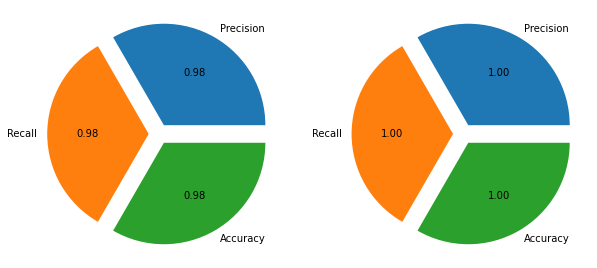

In [95]:
fig = plt.figure(figsize =(10, 7))
plt.subplot(1,2,1)
plt.pie(list1, labels = ['Precision','Recall','Accuracy'],explode=(0.1,0.1,0.1),
        autopct='0.98')

plt.subplot(1,2,2)
plt.pie(list2, labels = ['Precision','Recall','Accuracy'],explode=(0.1,0.1,0.1),autopct='1.00')

### catboost

In [96]:
import catboost

In [97]:
from catboost import CatBoostClassifier

In [98]:
model_cat=CatBoostClassifier(verbose=0)
model_cat.fit(x_train,y_train)
pred_cat=model_cat.predict(x_test)
acc_cat=accuracy_score(pred_cat,y_test)
acc_cat

0.9725708371069997

In [99]:
a=classification_report(pred_cat,y_test)

In [100]:
a

'              precision    recall  f1-score   support\n\n           0       0.97      0.98      0.97      3828\n           1       0.98      0.97      0.97      3901\n\n    accuracy                           0.97      7729\n   macro avg       0.97      0.97      0.97      7729\nweighted avg       0.97      0.97      0.97      7729\n'

In [101]:
cm=confusion_matrix(pred_cat,y_test)
cm

array([[3734,   94],
       [ 118, 3783]])

In [102]:
pred_catboost_train=model_cat.predict(x_train)

classification_report(pred_catboost_train,y_train)




'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99      5816\n           1       0.99      0.99      0.99      5777\n\n    accuracy                           0.99     11593\n   macro avg       0.99      0.99      0.99     11593\nweighted avg       0.99      0.99      0.99     11593\n'

### summary

In [107]:
t={"Models":pd.Series(["Logistic regression", "SVM", "Gaussian Naive bayes","KNeighborsClassifier","Decision tree","Random forest","XGB","Cat boost"]),
  "Accuracy":[accuracy1,svc_score2,gaus_score,accuracy_knn,accuracy_dec,rf_score,acc_xgb,acc_cat],
#"Precision":[]
  }
table=pd.DataFrame(t)
table

,Models,Accuracy
0,Logistic regression,0.887049
1,SVM,0.687670
2,Gaussian Naive bayes,0.837236
3,KNeighborsClassifier,0.934274
4,Decision tree,0.920171
5,Random forest,0.968819
6,XGB,0.981757
7,Cat boost,0.972571


### For deployment

In [34]:
import pickle



In [36]:
X_smote=x_smote.drop(['UDI','TWF','HDF','OSF','PWF','RNF'],axis=1)
X_smote

,Type,AT,PT,RS,T,TW
0,2,298.100000,308.600000,1551,42.800000,0
1,1,298.200000,308.700000,1408,46.300000,3
2,1,298.100000,308.500000,1498,49.400000,5
3,1,298.200000,308.600000,1433,39.500000,7
4,1,298.200000,308.700000,1408,40.000000,9
...,...,...,...,...,...,...
19317,1,298.345120,308.676806,2555,8.988849,75
19318,1,300.819599,310.139199,1402,60.817810,190
19319,1,302.400000,310.200000,1349,49.187395,153
19320,2,301.952428,310.434952,1369,48.611658,82


In [40]:
x_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19322 entries, 0 to 19321
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UDI     19322 non-null  int64  
 1   Type    19322 non-null  int64  
 2   AT      19322 non-null  float64
 3   PT      19322 non-null  float64
 4   RS      19322 non-null  int64  
 5   T       19322 non-null  float64
 6   TW      19322 non-null  int64  
 7   TWF     19322 non-null  int64  
 8   HDF     19322 non-null  int64  
 9   PWF     19322 non-null  int64  
 10  OSF     19322 non-null  int64  
 11  RNF     19322 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.8 MB


In [37]:
model_xgb_final=XGBClassifier()
model_xgb_final.fit(X_smote,y_smote)

/Users/lakshmipriya/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:59:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
pickle.dump(model_xgb_final,open('xgb1.pkl','wb'))